# Logistic Regression

Logistic regression is a statistical method used for binary classification, where the dependent variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No). It is named after the logistic function, also known as the sigmoid function, which is used to model the probability of the dependent variable belonging to a particular class.

Core Idea:

Logistic regression predicts the probability of an event falling into one of two categories. Unlike linear regression that predicts continuous values, logistic regression outputs a value between 0 and 1, representing the likelihood of an instance belonging to a specific class.

### Reasons for Using Logistic Regression



Binary Classification: Logistic regression is particularly useful when the outcome variable is binary, making it suitable for problems like spam detection, medical diagnosis (disease present or not), etc.

Interpretability: Logistic regression provides interpretable results. The coefficients of the model represent the change in the log-odds of the dependent variable for a one-unit change in the predictor variable.

Simple and Fast: Logistic regression is relatively simple to implement and computationally efficient. It doesn't require high computational resources compared to more complex models.

Well-understood: Logistic regression has been extensively studied and understood for many years. It is a well-established method with a solid theoretical foundation.

### Advantages of Logistic Regression:



Interpretability: As mentioned earlier, the results are easily interpretable, providing insights into the relationship between predictors and the probability of a particular outcome.

Low Variance: Logistic regression is less prone to overfitting, especially when the number of features is small.

Efficiency: It can handle both numerical and categorical features.

Works well with small datasets: Logistic regression can perform well even with a relatively small number of observations.

### Limitations of Logistic Regression:



Assumes Linearity: Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. This assumption may not always hold.

Requires Independence: It assumes that the observations are independent of each other, which might not be the case in some situations.

Sensitivity to Outliers: Logistic regression can be sensitive to outliers, which might influence the model's performance.

### Features to Consider Before Using Logistic Regression:



Linearity: Check if the relationship between the independent variables and the log-odds of the dependent variable is approximately linear.

Independence of Observations: Ensure that observations are independent of each other.

Multicollinearity: Check for multicollinearity among the independent variables, as high correlations can affect the stability of the coefficients.

Outliers: Evaluate the dataset for outliers that may impact the model.

Sample Size: Logistic regression typically requires a relatively large sample size for stable estimates.

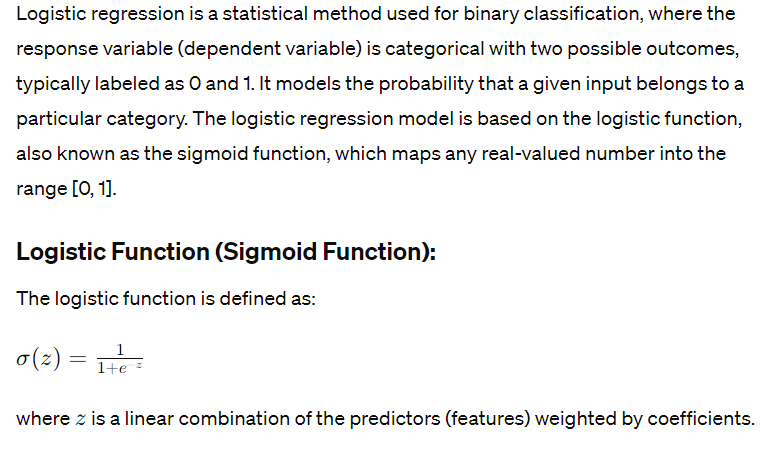

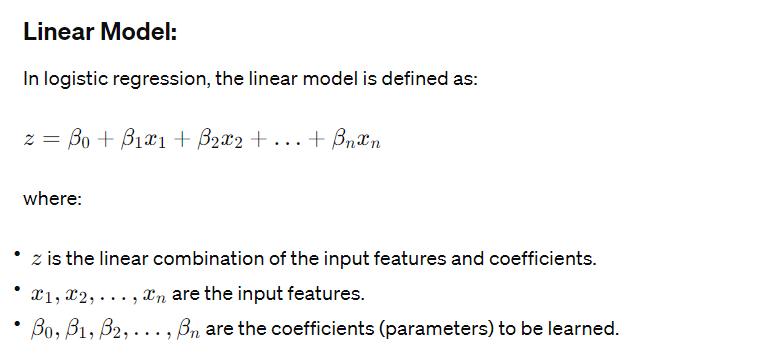

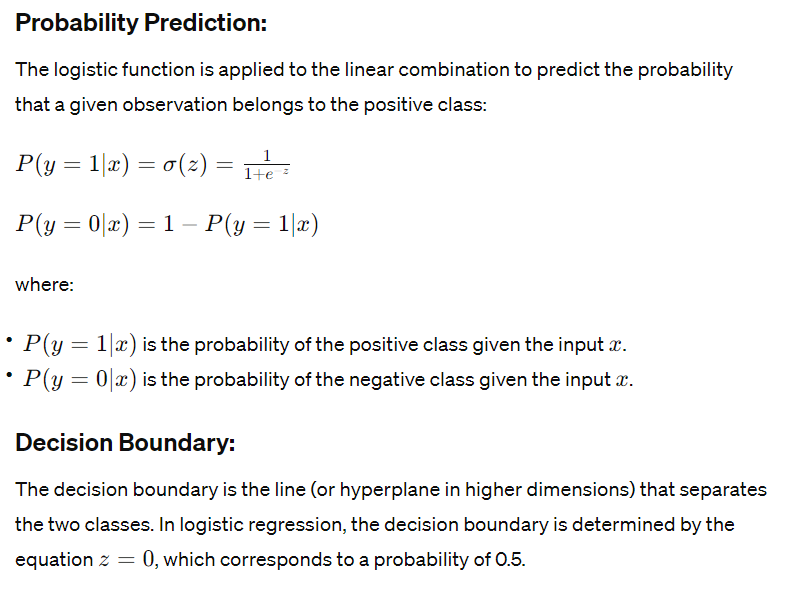

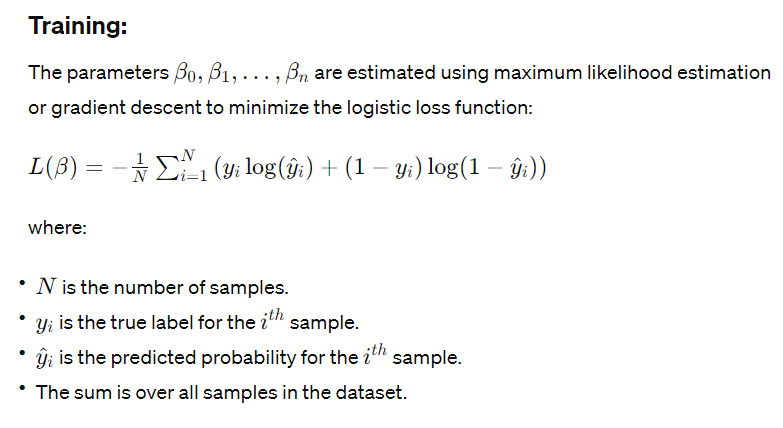

# Let's now see how to do it 

Have a look at the steps that are followed:
1. Load the data
2. Analyse the data
3. Data Preparation
4. Training
5. Predictions
6. Evaluation

## Load the Data

In [20]:
# Step 1: Load the data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('data/Iris.csv')

print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


## Exploratory Data Analysis (EDA)

In [22]:
# Basic statistical summary
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


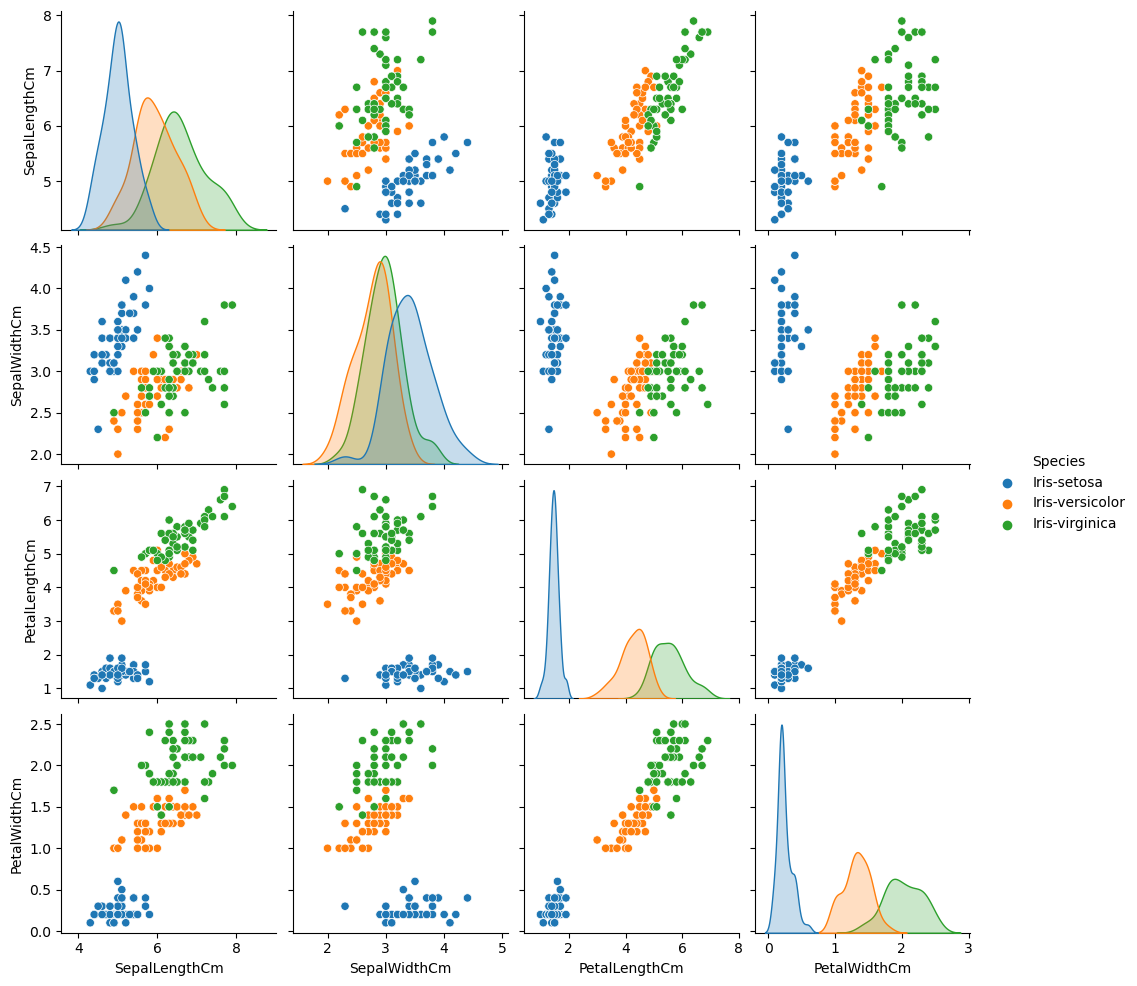

In [23]:
# Visualize the relationships between features using pairplot

sns.pairplot(df, hue='Species')

C:\Users\hariharan.sivakumar\AppData\Local\Temp\ipykernel_33084\2569056058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


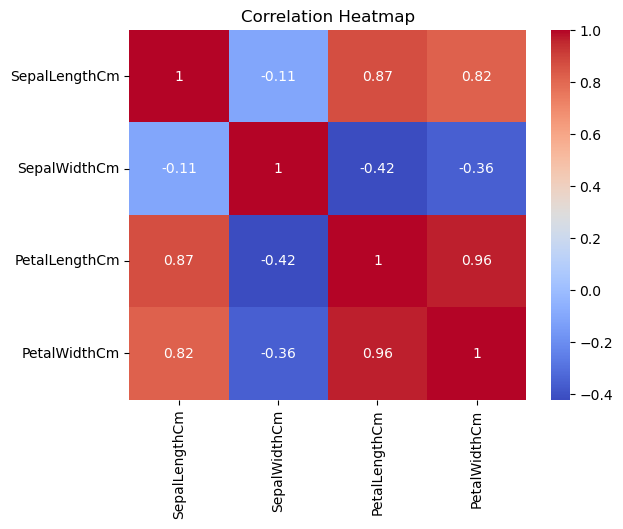

In [24]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preparation

In [25]:
# Check for missing values (Iris dataset is clean, so no missing values expected)
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [26]:
y = df.Species
X = df.loc[:,["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

In [27]:
print(y.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [28]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [29]:
#  Training
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [30]:
print(X_train.shape)

print(X_test.shape)

(112, 4)
(38, 4)


In [31]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

print(X_train_transformed.shape)

(112, 4)


## Training

In [32]:
# Training

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [33]:
print(classifier.coef_)

[[-1.02109827  1.04251016 -1.7790278  -1.66102155]
 [ 0.54183308 -0.35994548 -0.26906514 -0.7168076 ]
 [ 0.47926519 -0.68256468  2.04809293  2.37782915]]


In [34]:
print(classifier.intercept_)

[-0.42098126  1.77047957 -1.34949831]


## Prediction

In [35]:
# Predictions
# Use the trained model to make predictions on the test set
y_test_pred = classifier.predict(X_test)

c:\Users\hariharan.sivakumar\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Evaluation

In [36]:
#  Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))

# Display confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.24

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        13
Iris-versicolor       0.00      0.00      0.00        16
 Iris-virginica       0.31      1.00      0.47         9

       accuracy                           0.24        38
      macro avg       0.10      0.33      0.16        38
   weighted avg       0.07      0.24      0.11        38


Confusion Matrix:
[[ 0  9  4]
 [ 0  0 16]
 [ 0  0  9]]


c:\Users\hariharan.sivakumar\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hariharan.sivakumar\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hariharan.sivakumar\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [4]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
beta = np.array([0, 1, -1])  # beta_0, beta_1, beta_2

# Define the dataset
X = np.array([[2, 3], [1, 4], [4, 1], [3, 2]])
y = np.array([0, 0, 1, 1])

# Step 2: Calculate z
z = np.dot(X, beta[1:]) + beta[0]

# Step 3: Apply sigmoid function
y_hat = sigmoid(z)

# Step 4: Calculate loss
loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Print the calculated values
print("z:", z)
print("Predicted probabilities:", y_hat)
print("Loss:", loss)


z: [-1 -3  3  1]
Predicted probabilities: [0.26894142 0.04742587 0.95257413 0.73105858]
Loss: 0.18092451954598238


# Classification Metrics

## Accuracy: 

It measures the proportion of correctly classified instances out of the total instances. It's calculated as (TP + TN) / (TP + TN + FP + FN), where TP is true positives, TN is true negatives, FP is false positives, and FN is false negatives.

Pros:
1. Easy to understand and interpret.   
2. Provides a general measure of model performance.

Cons:
1. Not suitable for imbalanced datasets, where accuracy can be misleading.
2. Ignores the distribution of classes and may not reflect the actual performance of the model.

## Precision

It measures the proportion of true positive predictions among all positive predictions made by the model. Precision is calculated as TP / (TP + FP).

Pros:

1. Useful when the cost of false positives is high.
2. Provides insight into the model's ability to avoid false positives.

Cons:
1. Doesn't consider false negatives, so it may not give a complete picture of model performance.
2. Can be misleading in the presence of imbalanced datasets.

## Recall (Sensitivity or True Positive Rate)

It measures the proportion of true positives that were correctly identified by the model. Recall is calculated as TP / (TP + FN).

Pros:
1. Useful when the cost of false negatives is high.
2. Provides insight into the model's ability to capture all positive instances.

Cons:
1. Doesn't consider false positives, so it may not give a complete picture of model performance.
2. Can be misleading in the presence of imbalanced datasets.

## F1 Score 

It is the harmonic mean of precision and recall. It balances between precision and recall and is calculated as 2 * (precision * recall) / (precision + recall).

Pros:
1. Harmonic mean of precision and recall, providing a balance between the two metrics.
2. Suitable for imbalanced datasets.

Cons:
1. Gives equal weight to precision and recall, which may not always be desirable.
2. May not be suitable for all scenarios, such as when precision and recall have different importance.

## Specificity (True Negative Rate)

 It measures the proportion of true negatives that were correctly identified by the model. Specificity is calculated as TN / (TN + FP).

Pros:
1. Complements sensitivity (recall) by focusing on true negatives.
2. Useful when the emphasis is on correctly identifying negative instances.

Cons:
1. May not be as intuitive to interpret as sensitivity.
2. Doesn't provide a complete picture of model performance on positive instances.

## FPR (False Positive Rate)

It measures the proportion of false positives out of all actual negative instances. FPR is calculated as FP / (TN + FP).

Pros:
1. Complements sensitivity by focusing on false positives.
2. Useful for evaluating the model's ability to avoid false alarms.

Cons:
1. May not be as intuitive to interpret as sensitivity.
2. Doesn't provide a complete picture of model performance on positive instances.

## FNR (False Negative Rate)

It measures the proportion of false negatives out of all actual positive instances. FNR is calculated as FN / (TP + FN).

Pros:
1. Complements specificity by focusing on false negatives.
2. Useful for evaluating the model's ability to capture all positive instances.

Cons:
1. May not be as intuitive to interpret as specificity.
2. Doesn't provide a complete picture of model performance on negative instances.

## ROC Curve (Receiver Operating Characteristic Curve)It

It is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

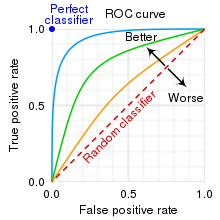

Pros:
1. Provides a comprehensive analysis of the trade-off between true positive rate and false positive rate.
2. Suitable for evaluating model performance across different thresholds.

Cons:
1. May not be suitable for imbalanced datasets, especially when the positive class is rare.
2. AUC-ROC can be misleading in the presence of class imbalance or when the costs of false positives and false negatives are asymmetric.

## AUC-ROC (Area Under the ROC Curve)

It quantifies the overall performance of a classification model based on the area under the ROC curve. A higher AUC-ROC value indicates better discrimination between positive and negative classes.

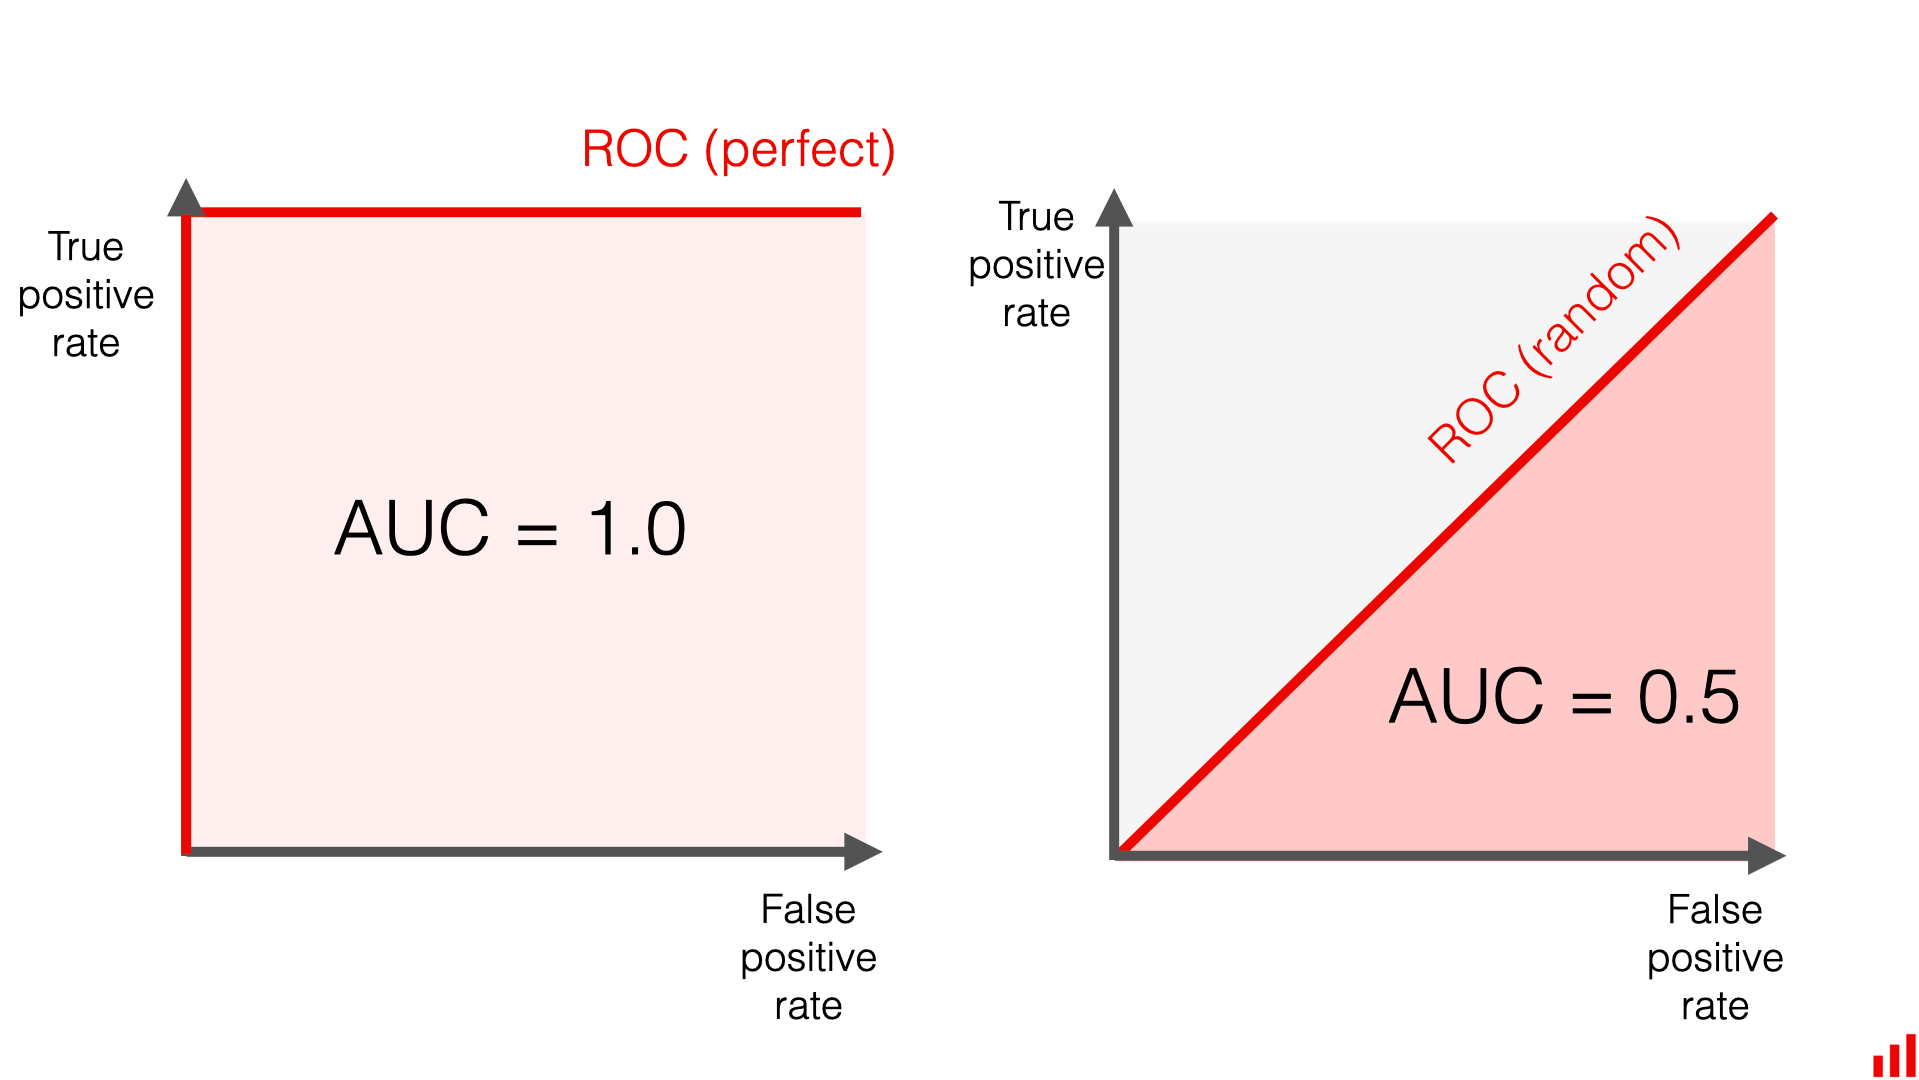 

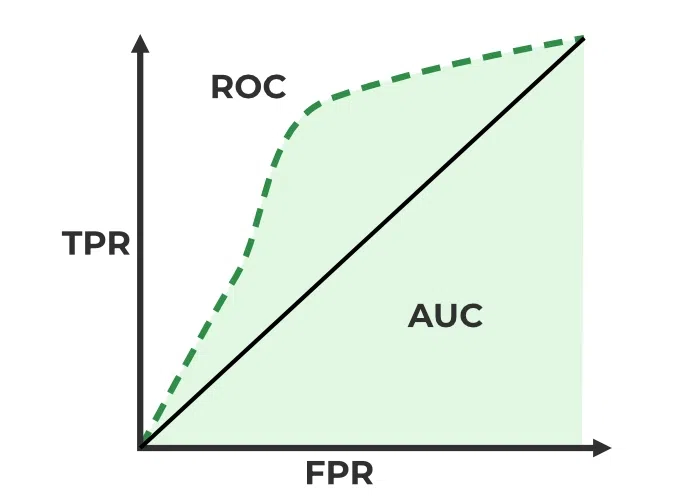

Pros:
1. Provides a comprehensive analysis of the trade-off between true positive rate and false positive rate.
2. Suitable for evaluating model performance across different thresholds.

Cons:
1. May not be suitable for imbalanced datasets, especially when the positive class is rare.
2. AUC-ROC can be misleading in the presence of class imbalance or when the costs of false positives and false negatives are asymmetric.


## AUC-PR (Area Under the PR Curve)

 It quantifies the overall performance of a classification model based on the area under the precision-recall curve. A higher AUC-PR value indicates better trade-off between precision and recall.

Pros:
1. Focuses on the trade-off between precision and recall, which is especially useful for imbalanced datasets.
2. Provides insights into model performance at different threshold settings.

Cons:
1. May not be as widely used or understood as ROC curves.
2. AUC-PR may not always provide a clear indication of model performance, especially when precision and recall have different importance.

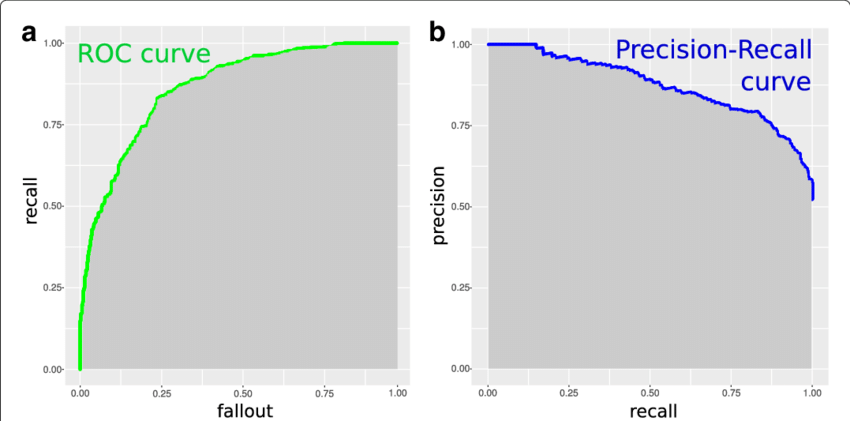

These metrics provide insights into different aspects of model performance and help in understanding how well the model is performing for the given classification task. The choice of metric depends on the specific requirements and characteristics of the problem at hand.